<Figure size 1000x600 with 0 Axes>

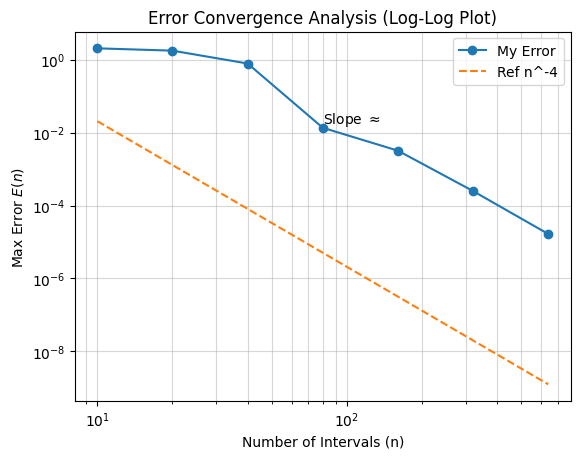

In [3]:
#5.3.1/2(a)
import numpy as np
import matplotlib.pyplot as plt

def spinterp(t, y):
    #三次样条插值
    n = len(t) - 1
    #先初始化各类需要的向量与矩阵
    h = [t[i + 1] - t[i] for i in range(n)] #h
    Z = np.zeros([n, n]) #全零矩阵
    H = np.diag(h) #H矩阵（h占对角线）
    J = np.eye(n) + np.diag(-np.ones(n - 1), 1) #差分矩阵
    I = np.eye(n) #单位矩阵
    E = I[: n - 1, :]

    #左连续条件
    AL = np.hstack([I, Z, Z, Z])
    vL = y[:-1] #和区间的起点有关系

    #右连续条件
    AR = np.hstack([I, H, H**2, H**3])
    vR = y[1:] #和区间的中点有关系

    #一阶导条件
    A1 = E @ np.hstack([Z, J, 2*H, 3 * H**2])
    v1 = np.zeros(n - 1)

    #二阶导条件
    A2 = E @ np.hstack([Z, Z, J, 3 * H])
    v2 = np.zeros(n - 1)

    #非节点条件
    nakL = np.hstack([np.zeros(3 * n), np.hstack([1, -1, np.zeros(n - 2)])]) #d1 - d2 = 0
    nakR = np.hstack([np.zeros(3 * n), np.hstack([np.zeros(n - 2), 1, -1])]) #dn-2 - dn-1 = 0

    #构造出最终矩阵一起求解出[a b c d]^T这个巨大向量
    A = np.vstack([AL, AR, A1, A2, nakL, nakR])
    v = np.hstack([vL, vR, v1, v2, 0, 0])
    z = np.linalg.solve(A, v)

    #分割出abcd
    rows = np.arange(n)
    a = z[rows]
    b = z[n + rows]
    c = z[2 * n + rows]
    d = z[3 * n + rows]
    
    #把abcd插值成三次多项式
    S = [np.poly1d([d[k], c[k], b[k], a[k]]) for k in range(n)]

    #构造三次样条函数
    def evaluate(x):
        f = np.zeros(x.shape)
        
        for k in range(n):
            index = (x >= t[k]) & (x <= t[k + 1])
            f[index] = S[k](x[index] - t[k])
        
        return f

    return evaluate #spinterp()函数最终返回一个函数对象 这个函数对象可以得到三次样条插值函数

n_values = np.array([10, 20, 40, 80, 160, 320, 640])
f_a = lambda x: np.cos(np.pi * x**2)
test_points = np.linspace(0, 4, 1600)
truth_at_test = f_a(test_points)

errors = []
for n in n_values:
    nodes = np.linspace(0, 4, n+1)
    y_nodes = f_a(nodes)
    #构建插值函数
    f_cubic = spinterp(nodes, y_nodes)
    #计算值的集合
    cubic_evaluate = f_cubic(test_points)
    #计算最大误差
    current_error = np.max(np.abs(truth_at_test - cubic_evaluate))
    errors.append(current_error)

plt.figure(figsize=(10, 6))
fig, ax = plt.subplots()
plt.loglog(n_values, errors, label='My Error', marker='o')
#画标准线
C = errors[0] * (n_values[0]**2)
ref_line = [C * (float(n)**-4) for n in n_values]
plt.loglog(n_values, ref_line, label='Ref n^-4', linestyle='--')

plt.xlabel('Number of Intervals (n)')
plt.ylabel('Max Error $E(n)$')
plt.title('Error Convergence Analysis (Log-Log Plot)')
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.legend()

# 显示斜率注释
plt.text(n_values[3], errors[3], f"Slope $\\approx$ ", verticalalignment='bottom')

plt.show()


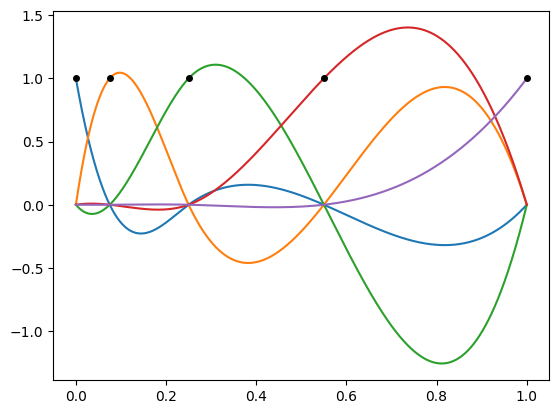

In [22]:
#5.3.3
import numpy as np
import matplotlib.pyplot as plt

def spinterp(t, y):
    #三次样条插值
    n = len(t) - 1
    #先初始化各类需要的向量与矩阵
    h = [t[i + 1] - t[i] for i in range(n)] #h
    Z = np.zeros([n, n]) #全零矩阵
    H = np.diag(h) #H矩阵（h占对角线）
    J = np.eye(n) + np.diag(-np.ones(n - 1), 1) #差分矩阵
    I = np.eye(n) #单位矩阵
    E = I[: n - 1, :]

    #左连续条件
    AL = np.hstack([I, Z, Z, Z])
    vL = y[:-1] #和区间的起点有关系

    #右连续条件
    AR = np.hstack([I, H, H**2, H**3])
    vR = y[1:] #和区间的中点有关系

    #一阶导条件
    A1 = E @ np.hstack([Z, J, 2*H, 3 * H**2])
    v1 = np.zeros(n - 1)

    #二阶导条件
    A2 = E @ np.hstack([Z, Z, J, 3 * H])
    v2 = np.zeros(n - 1)

    #非节点条件
    nakL = np.hstack([np.zeros(3 * n), np.hstack([1, -1, np.zeros(n - 2)])]) #d1 - d2 = 0
    nakR = np.hstack([np.zeros(3 * n), np.hstack([np.zeros(n - 2), 1, -1])]) #dn-2 - dn-1 = 0

    #构造出最终矩阵一起求解出[a b c d]^T这个巨大向量
    A = np.vstack([AL, AR, A1, A2, nakL, nakR])
    v = np.hstack([vL, vR, v1, v2, 0, 0])
    z = np.linalg.solve(A, v)

    #分割出abcd
    rows = np.arange(n)
    a = z[rows]
    b = z[n + rows]
    c = z[2 * n + rows]
    d = z[3 * n + rows]
    
    #把abcd插值成三次多项式
    S = [np.poly1d([d[k], c[k], b[k], a[k]]) for k in range(n)]

    #构造三次样条函数
    def evaluate(x):
        f = np.zeros(x.shape)
        
        for k in range(n):
            index = (x >= t[k]) & (x <= t[k + 1])
            f[index] = S[k](x[index] - t[k])
        
        return f

    return evaluate #spinterp()函数最终返回一个函数对象 这个函数对象可以得到三次样条插值函数

t = np.array([0, 0.075, 0.25, 0.55, 1])
n = len(t)
i_matrix = np.eye(n)
xx = np.linspace(0, 1, 1600)

fig, ax = plt.subplots()
for k in range(n):
    y = i_matrix[k]
    f_cubic = spinterp(t, y)
    plt.plot(xx, f_cubic(xx))
    plt.plot(t[k], 1, 'o', color='black', markersize=4)

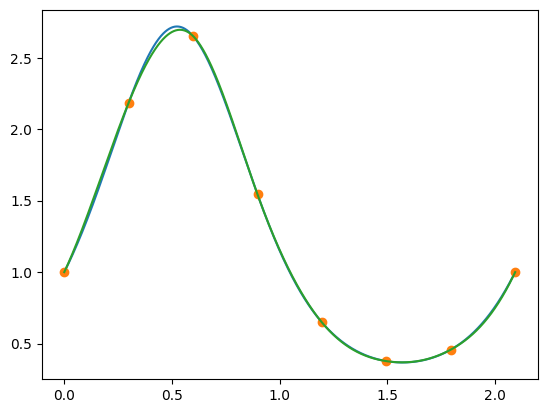

In [2]:
#5.3.3
import numpy as np
import matplotlib.pyplot as plt

def spinterp(t, y):
    #三次样条插值
    n = len(t) - 1
    #先初始化各类需要的向量与矩阵
    h = [t[i + 1] - t[i] for i in range(n)] #h
    Z = np.zeros([n, n]) #全零矩阵
    H = np.diag(h) #H矩阵（h占对角线）
    J = np.eye(n) + np.diag(-np.ones(n - 1), 1) #差分矩阵
    I = np.eye(n) #单位矩阵
    E = I[: n - 1, :]

    #左连续条件
    AL = np.hstack([I, Z, Z, Z])
    vL = y[:-1] #和区间的起点有关系

    #右连续条件
    AR = np.hstack([I, H, H**2, H**3])
    vR = y[1:] #和区间的中点有关系

    #一阶导条件
    A1 = E @ np.hstack([Z, J, 2*H, 3 * H**2])
    v1 = np.zeros(n - 1)

    #二阶导条件
    A2 = E @ np.hstack([Z, Z, J, 3 * H])
    v2 = np.zeros(n - 1)

    #周期条件
    e1 = np.zeros(n)
    e1[0] = 1
    en = np.zeros(n)
    en[-1] = 1
    h_end = h[-1]

    per1 = np.hstack([np.zeros(n), e1 - en, -2 * h_end * en, -3 * h_end**2 * en])
    per2 = np.hstack([np.zeros(n), np.zeros(n), 2*e1 - 2*en, -6 * h_end * en])

    #构造出最终矩阵一起求解出[a b c d]^T这个巨大向量
    A = np.vstack([AL, AR, A1, A2, per1, per2])
    v = np.hstack([vL, vR, v1, v2, 0, 0])
    z = np.linalg.solve(A, v)

    #分割出abcd
    rows = np.arange(n)
    a = z[rows]
    b = z[n + rows]
    c = z[2 * n + rows]
    d = z[3 * n + rows]
    
    #把abcd插值成三次多项式
    S = [np.poly1d([d[k], c[k], b[k], a[k]]) for k in range(n)]

    #构造三次样条函数
    def evaluate(x):
        f = np.zeros(x.shape)
        
        for k in range(n):
            index = (x >= t[k]) & (x <= t[k + 1])
            f[index] = S[k](x[index] - t[k])
        
        return f

    return evaluate #spinterp()函数最终返回一个函数对象 这个函数对象可以得到三次样条插值函数

xx = np.linspace(0, 2*np.pi / 3, 1600)
nodes = np.linspace(0, 2*np.pi / 3, 8)
f_truth = lambda x: np.exp(np.sin(3 * x))
f_eval = spinterp(nodes, f_truth(nodes))

fig, ax = plt.subplots()
plt.plot(xx, f_truth(xx))
plt.plot(nodes, f_eval(nodes), 'o')
plt.plot(xx, f_eval(xx))